<a href="https://colab.research.google.com/github/kuo8129/GenAI/blob/main/20250225HW_%E6%89%93%E9%80%A0%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF/20250225HW_%E6%89%93%E9%80%A0%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 讀入套件

In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

In [2]:
%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

# 神速打造web app的Gradio
import gradio as gr

# 讀入MNIST數據庫

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'訓練資料共 {len(x_train)} 筆')
print(f'測試資料共 {len(x_test)} 筆')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
訓練資料共 60000 筆
測試資料共 10000 筆


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[1234] # 訓練資料的樣貌

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        255, 129,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        253, 252, 215,  60,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53,
        150, 249, 252, 252,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 138, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   7, 129, 252, 243,  65,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  33, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 112, 210, 252, 212,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  69, 177,
        240, 249, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 252,
        253, 252, 240,  59,  41,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 252,
        253, 252, 245,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        149, 173, 253, 253, 178,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  11, 179, 252, 195,  18,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  67, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  15, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9, 153,  12,   0,   0,
          0,   0,  60, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   9, 144, 252, 129,   7,   0,
          0,   0, 164, 252, 199,  22,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  75, 252, 252, 252,  59,   0,
        134, 134, 210, 252,  99,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,  32, 210, 252, 241, 238,
        253, 252, 252, 252,  29,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 112, 241, 252,
        253, 252, 222, 136,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 252,
        253, 216,  36,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [7]:
y_train[1234] # 訓練資料的答案

3

# 資料前處理
輸入格式整理
* 將28*28矩陣轉成784長的向量
* 將像素值常模化至0-1之間


In [8]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
x_train.shape

(60000, 784)

輸出格式整理
* One Hot Enconding (用0和1表示)
* 將數值0-9轉成以長度為10的向量表示
* 例如：1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
n = 1234
print(f'第{n+1}筆數據的答案為{y_train[n]}')

第1235筆數據的答案為[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# 建構神經網路

In [10]:
# 設定隱藏層神經元數量
N1 = 20
N2 = 25
N3 = 30
N4 = 15

# 建構一個空的標準神經網路
model = Sequential()

# 隱藏層(4層DNN，使用ReLU作為激發函數)
model.add(Dense(N1, input_dim=784, activation='relu')) # 輸入有784個特徵
model.add(Dense(N2, activation='relu'))
model.add(Dense(N3, activation='relu'))
model.add(Dense(N4, activation='relu'))

# 輸出層(10個神經元，以softmax當激發函數)
model.add(Dense(10, activation='softmax'))

# 組裝(loss function用均方差(MSE), optimizer用隨機的Gradient descent(SGD)來訓練)
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])

# 檢視神經網路的架構
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │             525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,630 (68.87 KB)

 Trainable params: 17,630 (68.87 KB)

 Non-trainable params: 0 (0.00 B)

# 訓練神經網路
* 一次訓練 `batch_size = 50` 筆資料
* 所有資料一共要訓練 `epochs = 20` 次

In [11]:
model.fit(x_train, y_train, batch_size=50, epochs=20)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1371 - loss: 0.0893
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3109 - loss: 0.0798
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5371 - loss: 0.0593
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7169 - loss: 0.0399
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8146 - loss: 0.0283
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8553 - loss: 0.0222
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8799 - loss: 0.0186
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8942 - loss: 0.0165
Epoch 9/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9007 - loss: 0.0152
Epoch 10/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9077 - loss: 0.0142
Epoch 11/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9150 - loss: 0.0131
Epoch 12/20
1200/1200 ━━━━━━━━

# 測試神經網路學習成果

In [12]:
predict = np.argmax(model.predict(x_test), axis=-1)
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28, 28), cmap='Greys')
    answer = np.argmax(y_test[測試編號])
    if predict[測試編號] == answer:
        result = "判斷正確V"
    else:
        result = "判斷錯誤X"
    print(f'此筆資料神經網路判斷為{predict[測試編號]}，實際答案為{answer}，{result}')
interact_manual(test, 測試編號=(0, 9999));

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [13]:
loss, acc = model.evaluate(x_test, y_test)
print(f'測試資料loss值: {loss} ')
print(f'測試資料正確率: {acc*100:.2f} % ')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9329 - loss: 0.0105
測試資料loss值: 0.009335251525044441 
測試資料正確率: 94.03 % 


# 用Gradio展示成果

In [14]:
def resize_image(inp):
    # 圖在inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成PIL格式
    image_pil = Image.fromarray(image)

    # Alpha通道設為白色，再把圖從RGBA轉成RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到28x28，轉回numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合MNIST數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [15]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [ ]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0dbb42da0682dc511b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


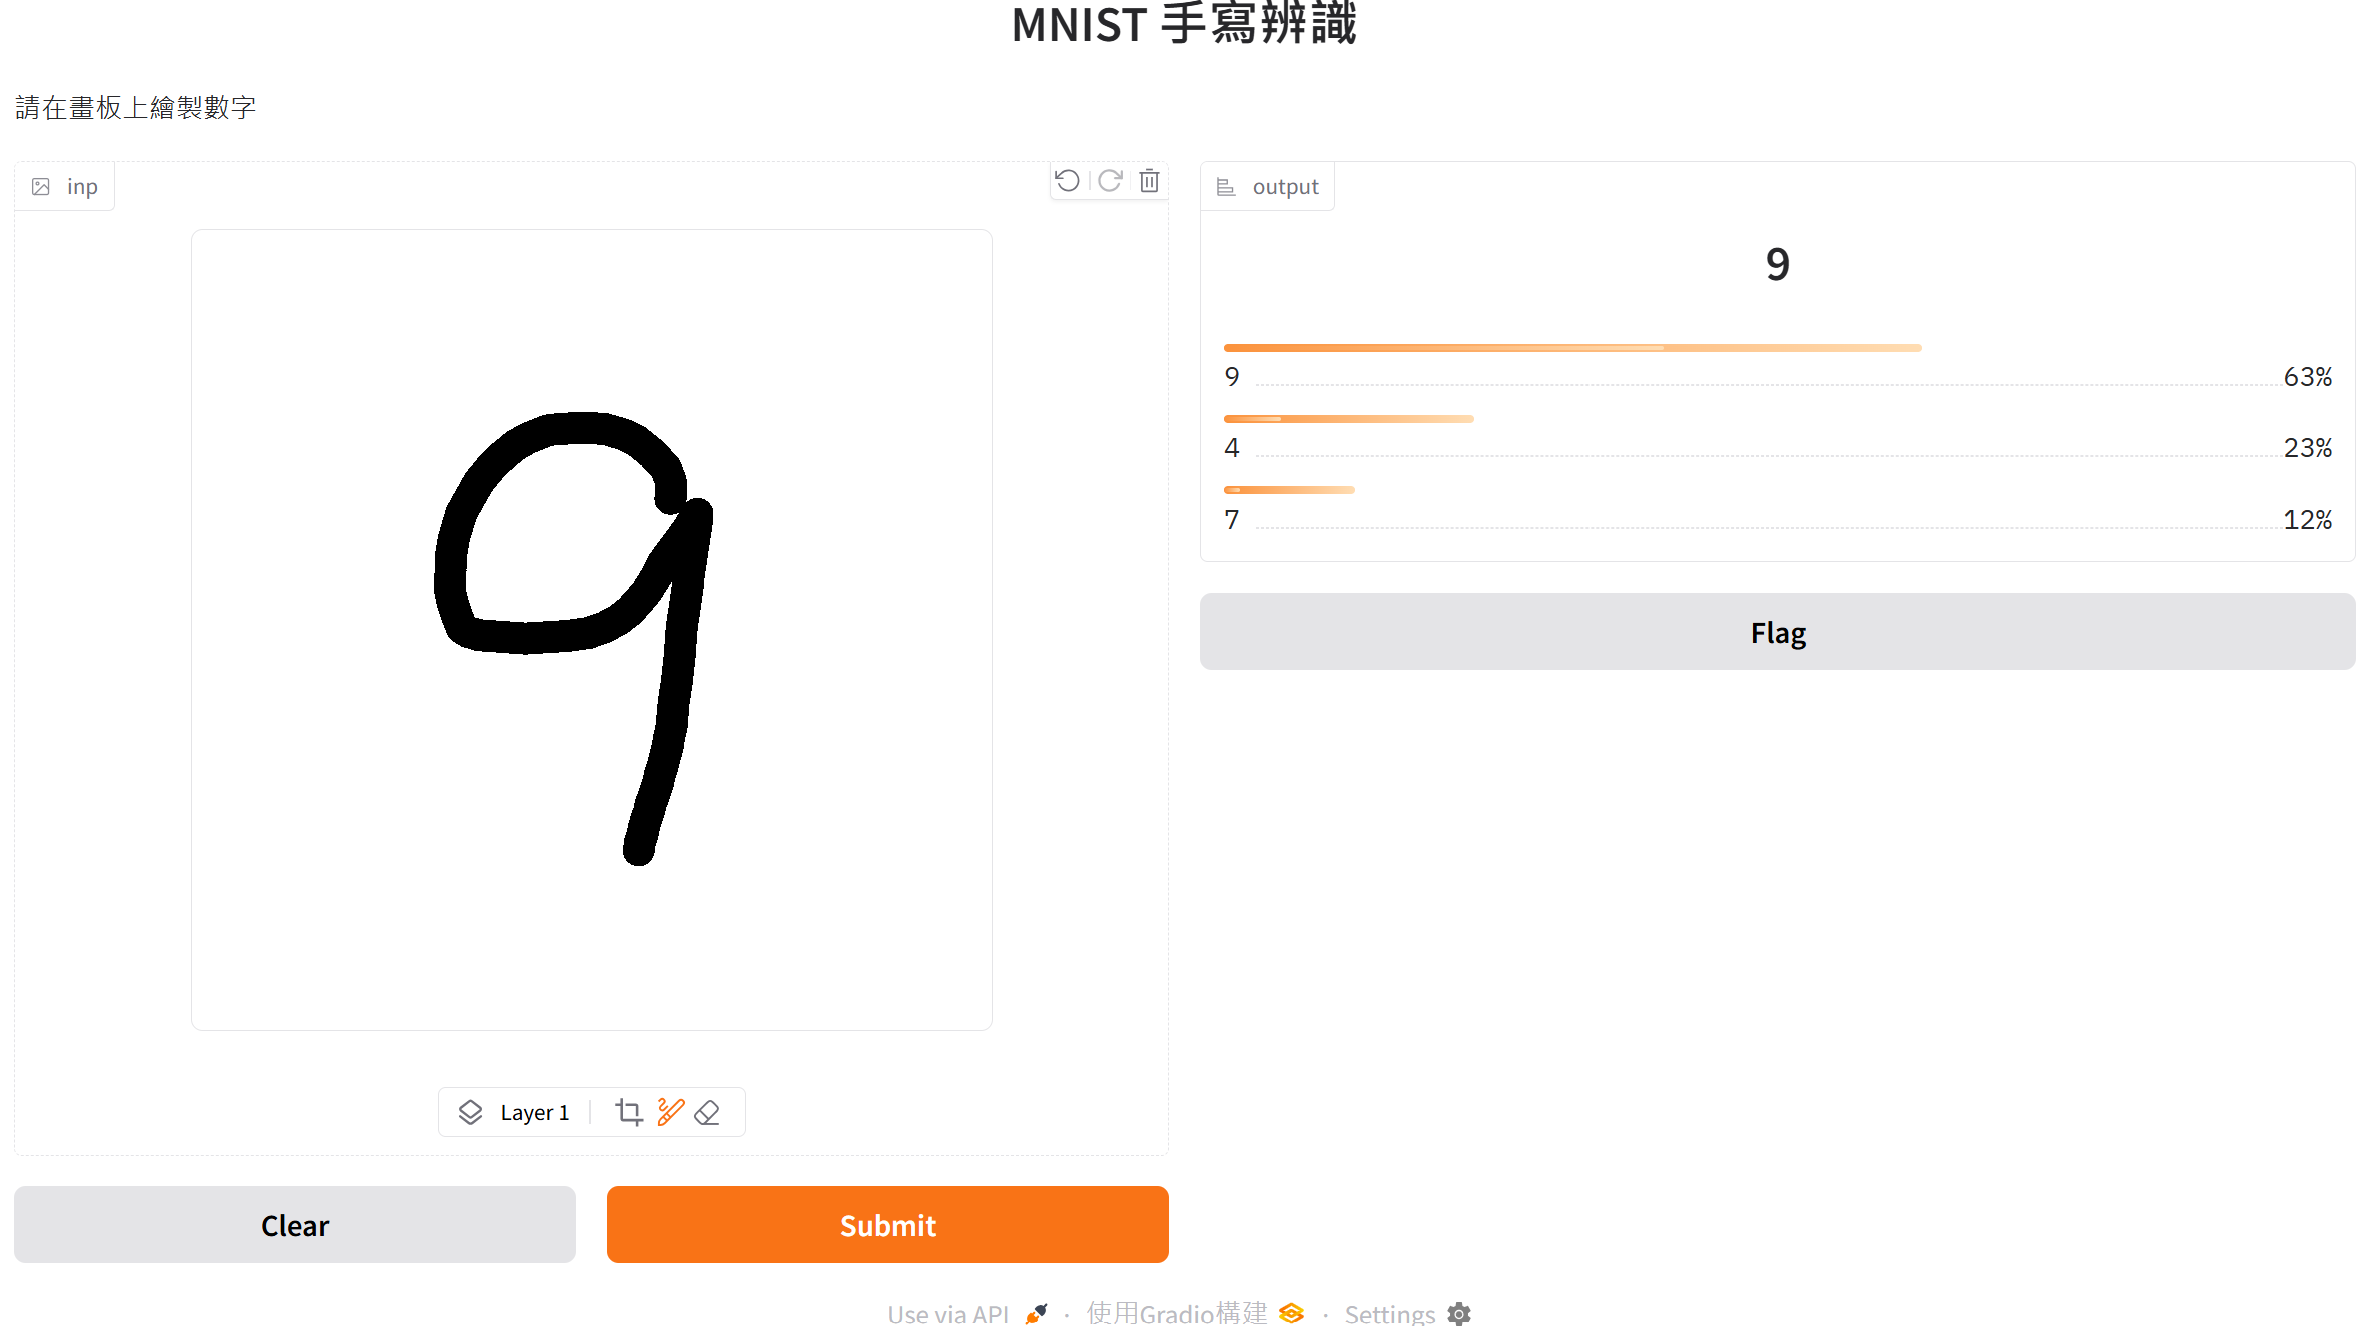